In [2]:
import scipy.signal as signal
import numpy as np
import librosa
import soundfile as sf

def apply_notch_filter(audio, center_frequency, quality_factor, sampling_rate):
    nyquist = 0.5 * sampling_rate
    center = center_frequency / nyquist
    Q = quality_factor

    # Design the notch filter
    b, a = signal.iirnotch(center, Q)

    # Apply the notch filter to the audio
    filtered_audio = signal.filtfilt(b, a, audio)

    return filtered_audio

def main():
    # Input and output file paths
    input_file_path = "C:/Users/apurv/CF_Chirp.wav"
    output_file_path = "C:/Users/apurv/notch_filtered_CF_Chirp.wav"

    # Load audio
    audio, sr = librosa.load(input_file_path, sr=None)

    # Notch filter parameters
    center_frequency = 4000  # Adjust according to the frequency you want to notch out
    quality_factor = 40     # Adjust the quality factor based on your requirements

    # Apply the notch filter
    filtered_audio = apply_notch_filter(audio, center_frequency, quality_factor, sr)

    # Save the filtered audio
    sf.write(output_file_path, filtered_audio, sr)

if __name__ == "__main__":
    main()


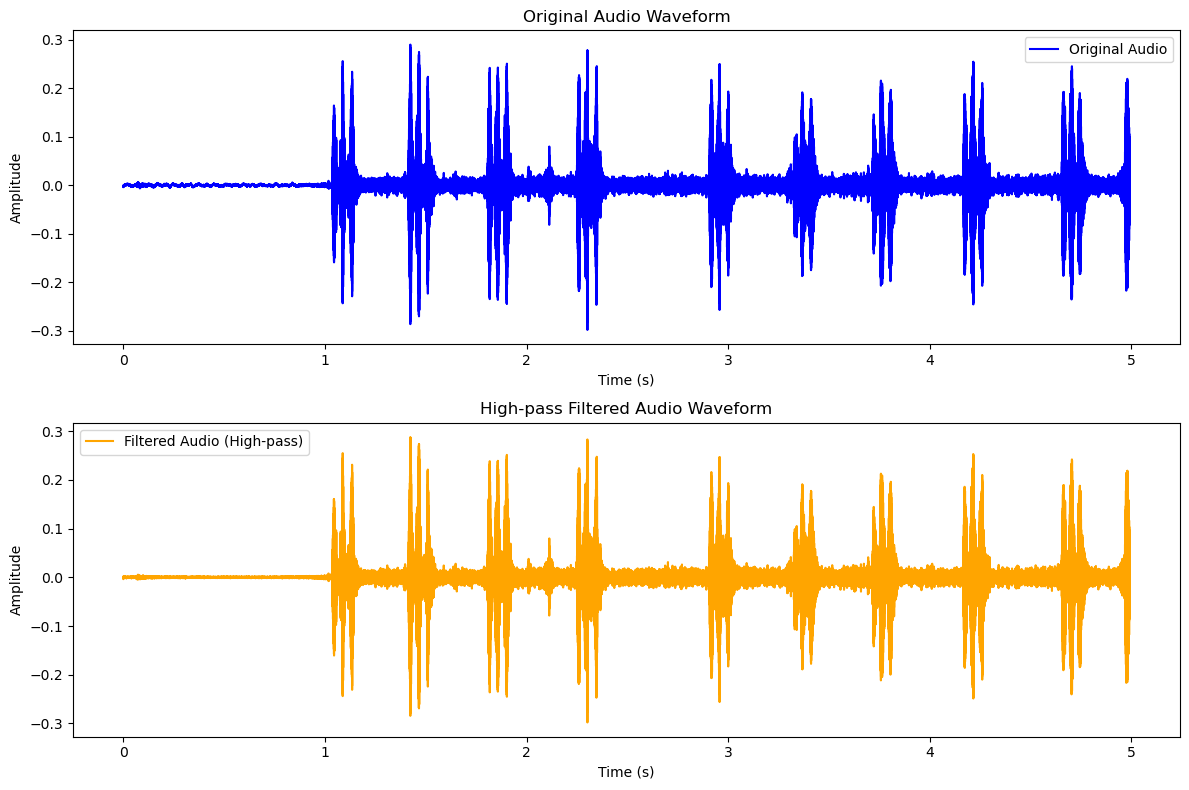

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
from scipy import signal

# Load the recorded audio file
file_path = 'C:/Users/apurv/CF_Chirp.wav'
audio_data, sample_rate = librosa.load(file_path, sr=None, mono=True)

# Design a high-pass filter
cutoff_frequency = 100  # Adjust this according to your needs
order = 4  # Adjust this according to your needs

b, a = signal.butter(order, cutoff_frequency / (0.5 * sample_rate), btype='high', analog=False)

# Apply the high-pass filter to the audio data
filtered_audio = signal.lfilter(b, a, audio_data)

# Plot the original and filtered signals separately
time = np.arange(0, len(audio_data)) / sample_rate

plt.figure(figsize=(12, 8))

# Plot the original audio
plt.subplot(2, 1, 1)
plt.plot(time, audio_data, label='Original Audio', color='blue')
plt.title('Original Audio Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

# Plot the filtered audio
plt.subplot(2, 1, 2)
plt.plot(time, filtered_audio, label='Filtered Audio (High-pass)', color='orange')
plt.title('High-pass Filtered Audio Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()


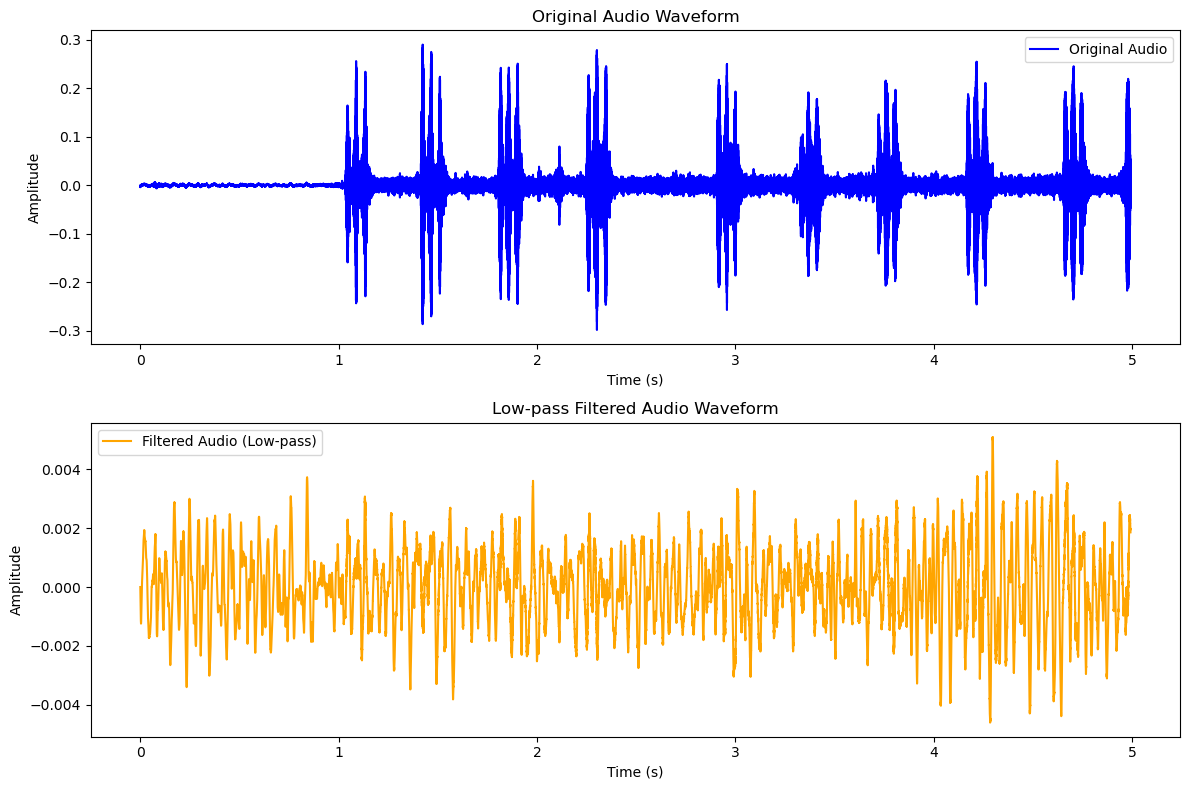

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
from scipy import signal

# Load the recorded audio file
file_path = 'C:/Users/apurv/CF_Chirp.wav'
audio_data, sample_rate = librosa.load(file_path, sr=None, mono=True)

# Design a low-pass filter
cutoff_frequency = 100  # Adjust this according to your needs
order = 2  # Adjust this according to your needs

b, a = signal.butter(order, cutoff_frequency / (0.5 * sample_rate), btype='low', analog=False)

# Apply the low-pass filter to the audio data
filtered_audio = signal.lfilter(b, a, audio_data)

# Plot the original and filtered signals separately
time = np.arange(0, len(audio_data)) / sample_rate

plt.figure(figsize=(12, 8))

# Plot the original audio
plt.subplot(2, 1, 1)
plt.plot(time, audio_data, label='Original Audio', color='blue')
plt.title('Original Audio Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

# Plot the filtered audio
plt.subplot(2, 1, 2)
plt.plot(time, filtered_audio, label='Filtered Audio (Low-pass)', color='orange')
plt.title('Low-pass Filtered Audio Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()


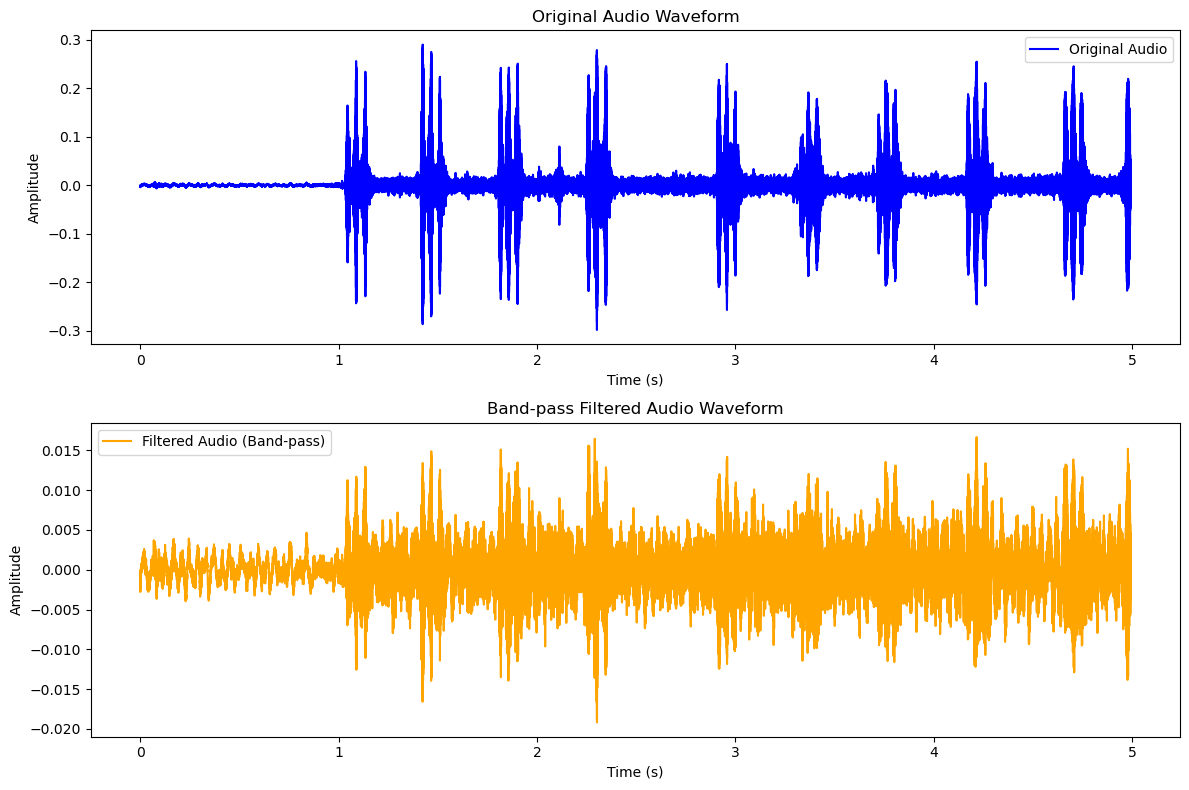

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
from scipy import signal

# Load the recorded audio file
file_path = 'C:/Users/apurv/CF_Chirp.wav'
audio_data, sample_rate = librosa.load(file_path, sr=None, mono=True)

# Design a band-pass filter
low_cutoff_frequency = 5  # Adjust this according to your needs
high_cutoff_frequency = 1000  # Adjust this according to your needs
order = 2  # Adjust this according to your needs

b, a = signal.butter(order, [low_cutoff_frequency / (0.5 * sample_rate), high_cutoff_frequency / (0.5 * sample_rate)],
                     btype='band', analog=False)

# Apply the band-pass filter to the audio data
filtered_audio = signal.lfilter(b, a, audio_data)

# Plot the original and filtered signals separately
time = np.arange(0, len(audio_data)) / sample_rate

plt.figure(figsize=(12, 8))

# Plot the original audio
plt.subplot(2, 1, 1)
plt.plot(time, audio_data, label='Original Audio', color='blue')
plt.title('Original Audio Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

# Plot the filtered audio
plt.subplot(2, 1, 2)
plt.plot(time, filtered_audio, label='Filtered Audio (Band-pass)', color='orange')
plt.title('Band-pass Filtered Audio Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()


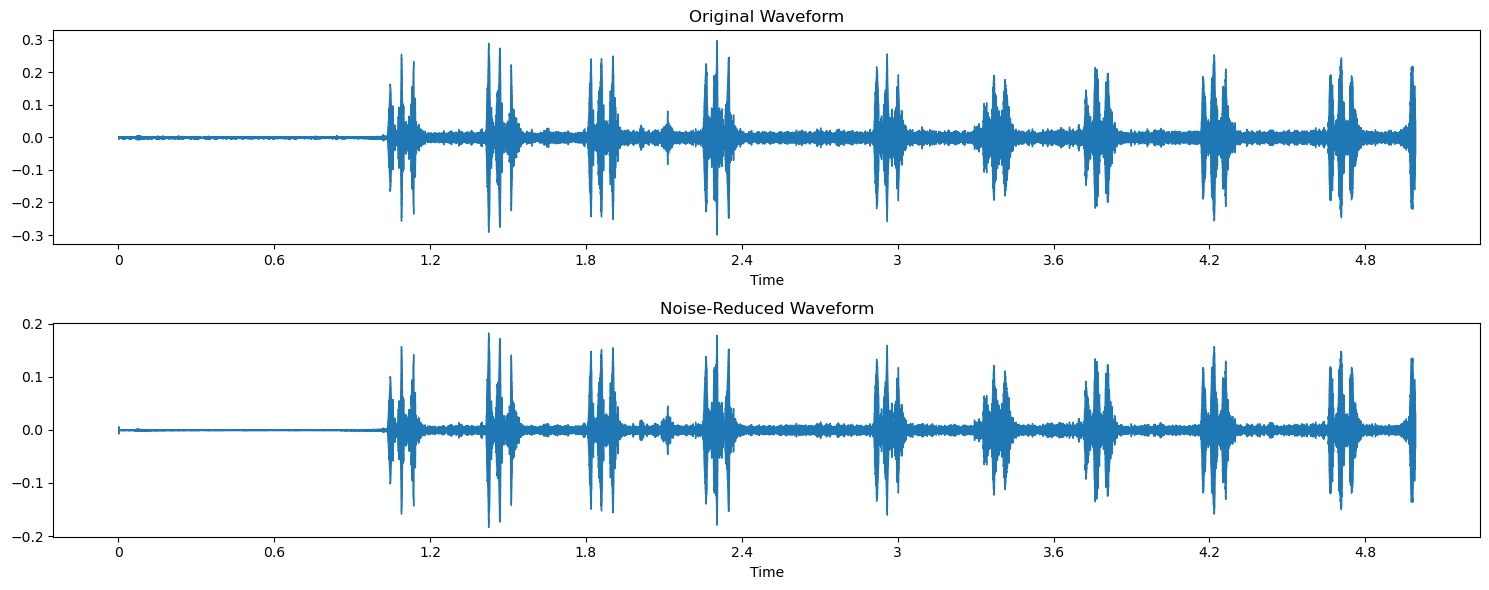

In [14]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

def load_audio(file_path, sr=44100):
    audio, sr = librosa.load(file_path, sr=sr)
    return audio, sr

def plot_comparison(original, processed, sr, title1="Original Waveform", title2="Processed Waveform"):
    plt.figure(figsize=(15, 6))

    plt.subplot(2, 1, 1)
    librosa.display.waveshow(original, sr=sr)
    plt.title(title1)

    plt.subplot(2, 1, 2)
    librosa.display.waveshow(processed, sr=sr)
    plt.title(title2)

    plt.tight_layout()
    plt.show()

def main():
    # Load audio file
    file_path = 'C:/Users/apurv/CF_Chirp.wav'
    audio, sr = load_audio(file_path)

    # Apply noise reduction using librosa's denoise module
    noise_reduced_audio = librosa.effects.preemphasis(audio)

    # Plot the comparison of original and noise-reduced waveforms
    plot_comparison(audio, noise_reduced_audio, sr, title1="Original Waveform", title2="Noise-Reduced Waveform")

if __name__ == "__main__":
    main()



